In [28]:
import nltk


In [29]:
import pandas as pd
import csv 
import numpy as np

In [4]:
## Criando o arquivo csv meta-fake

from os.path import exists

lista = [
'author',
'link',
'category',
'date of publication',
'number of tokens',
'number of words without punctuation',
'number of types',
'number of links inside the news',
'number of words in upper case',
'number of verbs',
'number of subjuntive and imperative verbs',
'number of nouns',
'number of adjectives',
'number of adverbs',
'number of modal verbs (mainly auxiliary verbs)',
'number of singular first and second personal pronouns',
'number of plural first personal pronouns',
'number of pronouns',
'pausality',
'number of characters',
'average sentence length',
'average word length',
'percentage of news with speeling errors',
'emotiveness',
'diversity'
]

df = pd.DataFrame(columns=lista)

for i in range(1,3603):
    file = 'C:/Users/milane/Downloads/Fake.br-Corpus-master/full_texts/fake-meta-information/{}-meta.txt'.format(i)
    if(exists(file)):
        with open(file, encoding='utf8') as f:
            csv_reader = f.readlines()
            lista2 = []
            for line in csv_reader:
                lista2.append(line.strip())
            df = df.append(pd.DataFrame([lista2], columns=lista),ignore_index=True)

df.to_csv('./meta-fake.csv',index=False)

In [5]:
## Criando o arquivo csv meta-true

df = pd.DataFrame(columns=lista)

for i in range(1,3603):
    file = 'C:/Users/milane/Downloads/Fake.br-Corpus-master/full_texts/true-meta-information/{}-meta.txt'.format(i)
    if(exists(file)):
        with open(file, encoding='utf8') as f:
            csv_reader = f.readlines()
            lista2 = []
            for line in csv_reader:
                lista2.append(line.strip())
            df = df.append(pd.DataFrame([lista2], columns=lista),ignore_index=True)

df.to_csv('./meta-true.csv',index=False)

In [6]:
## Criando o arquivo csv true

lista = ['ID','TAG','FULL_TEXT']

df = pd.DataFrame(columns=lista)

for i in range(1,3603):
    file = 'C:/Users/milane/Downloads/Fake.br-Corpus-master/full_texts/true/{}.txt'.format(i)
    if(exists(file)):
        with open(file, encoding='utf8') as f:
            csv_reader = f.read()
            lista2 = [str(i)+'true','true',csv_reader]
            df = df.append(pd.DataFrame([lista2], columns=lista),ignore_index=True)

df.to_csv('./true.csv',index=False)

In [7]:
## Criando o arquivo csv fake

df = pd.DataFrame(columns=lista)

for i in range(1,3603):
    file = 'C:/Users/milane/Downloads/Fake.br-Corpus-master/full_texts/fake/{}.txt'.format(i)
    if(exists(file)):
        with open(file, encoding='utf8') as f:
            csv_reader = f.read()
            lista2 = [str(i)+'fake','fake',csv_reader]
            df = df.append(pd.DataFrame([lista2], columns=lista),ignore_index=True)

df.to_csv('./fake.csv',index=False)

In [8]:
## Carregando os dataframes com seus respectivos arquivos csv

df_true = pd.read_csv('true.csv')
df_fake = pd.read_csv('fake.csv')
df_meta_true = pd.read_csv('meta-true.csv')
df_meta_fake = pd.read_csv('meta-fake.csv')

In [9]:
## Cria o dataframe juntando os dataframes true e fake, depois concatena com os dataframes meta_true e meta_fake
## Exporta um arquivo csv derivado do dataframe principal

df = pd.DataFrame()
df_meta = pd.DataFrame()
df_meta = df_meta.append(df_meta_true, ignore_index=True)
df_meta = df_meta.append(df_meta_fake, ignore_index=True)
df = df.append(df_true, ignore_index=True)
df = df.append(df_fake, ignore_index=True)
df = pd.concat([df,df_meta], axis=1)
df.to_csv('dataframe.csv')

In [10]:
## Carrega o arquivo csv em um dataframe

df = pd.read_csv('dataframe.csv')
df = df.reset_index(drop=True)
df = df.drop(columns=['Unnamed: 0'])
df['ID'] = df['ID'].str.upper()
df['TAG'] = df['TAG'].str.upper()

In [11]:
##Lista de palavras e caracteres que serão eliminadas

from string import punctuation
import unidecode
mais_palavras = ["''","``",".","r",")","-",","]
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
pontuacao = []
for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes + mais_palavras
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [12]:
## Cria a coluna processado retirando palavras sem contexto

processada = []
for texto in df['FULL_TEXT']:
  nova_frase = []
  frase = texto.lower()
  frase = unidecode.unidecode(frase)
  palavras_postagem = nltk.word_tokenize(frase)
  for palavra in palavras_postagem:
    if palavra not in stopwords_sem_acentos:
      nova_frase.append(palavra)
  processada.append(' '.join(nova_frase))

df['processado'] = processada

In [13]:
##Retira caracteres não utilizados

df['processado'] = df['processado'].str.replace('\d+', '')
df['processado'] = df['processado'].str.replace('.', '')
df['processado'] = df['processado'].str.replace('-', '')
df['processado'] = df['processado'].str.replace(',', '')

C:\Users\milane\AppData\Local\Temp\ipykernel_6964\1716908128.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processado'] = df['processado'].str.replace('\d+', '')
C:\Users\milane\AppData\Local\Temp\ipykernel_6964\1716908128.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['processado'] = df['processado'].str.replace('.', '')


In [19]:
## Cria a coluna com dados radicalizados com stemmer e deixa a quantidade de palavras das classes quase iguais
processada = []
stemmer = nltk.RSLPStemmer()
stop_words_stemmer = []
for stopword in stopwords_sem_acentos:
  stop_words_stemmer.append(stemmer.stem(stopword))

df_true = df['processado'].loc[df['TAG'] == 'TRUE']
df_true = df_true.reset_index()
df_true['lenght'] = [len(nltk.word_tokenize(text)) for text in df_true['processado']]
df_fake = df['processado'].loc[df['TAG'] == 'FAKE']
df_fake = df_fake.reset_index()
df_fake['lenght'] = [len(nltk.word_tokenize(text)) for text in df_fake['processado']]

for index,frase in enumerate(df_true['processado']):
  nova_frase = []
  palavras_frase = nltk.word_tokenize(frase)[0:df_fake['lenght'][index]]
  for palavra in palavras_frase:
    if palavra not in stop_words_stemmer:
      nova_frase.append(stemmer.stem(palavra))
  processada.append(' '.join(nova_frase))

for index,frase in enumerate(df_fake['processado']):
  nova_frase = []
  palavras_frase = nltk.word_tokenize(frase)[0:df_true['lenght'][index]]
  for palavra in palavras_frase:
    if palavra not in stop_words_stemmer:
      nova_frase.append(stemmer.stem(palavra))
  processada.append(' '.join(nova_frase))

df['processado_stemmer'] = processada

In [20]:
## Cria a coluna lenght para comparar a quantidade de palavras de cada classe

df['lenght'] = [len(nltk.word_tokenize(text)) for text in df['processado_stemmer']]

In [21]:
## Cria um arquivo em csv à partir do dataframe

df.to_csv('dataframe.final.csv')

In [43]:
#Imprime a quantidade de palavras de cada classe

print(df['lenght'].loc[df['TAG'] == 'TRUE'].sum())
print(df['lenght'].loc[df['TAG'] == 'FAKE'].sum())

369863
370167


In [23]:
##Separando os dados 70 a 30 realizando o Treinamento e o Teste

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

df2 = shuffle(df)
sentences = df2['processado_stemmer'].values
y = df2['TAG'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30, random_state=1000)
 
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

classifier = LogisticRegression(random_state=1000, max_iter=1000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8875


In [24]:
#Teste de predição com uma frase

classifier.predict(vectorizer.transform(['deput pt sab tudo michel temer Lula não']))

array(['FAKE'], dtype=object)

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
#Criando o Tf Idf das frases Verdadeiras e inserindo a RU na lista

doc_corpus= df['processado_stemmer'].loc[df['TAG'] == 'TRUE']
vec=TfidfVectorizer()
matrix=vec.fit_transform(doc_corpus)
dense = matrix.todense()
dense_list = np.asarray(dense)
feature_names = vec.get_feature_names_out()
df_true = pd.DataFrame(dense_list, columns=feature_names)
df_true = df_true.T.sum(axis=1)
df_true['RU:3451923'] = 90

In [27]:
#Criando o Tf Idf das frases Falsas e inserindo a RU na lista

doc_corpus= df['processado_stemmer'].loc[df['TAG'] == 'FAKE']
vec=TfidfVectorizer()
matrix=vec.fit_transform(doc_corpus)
dense = matrix.todense()
dense_list = np.asarray(dense)
feature_names= vec.get_feature_names_out()
df_fake = pd.DataFrame(dense_list, columns=feature_names)
df_fake = df_fake.T.sum(axis=1)
df_fake['RU:3451923'] = 120

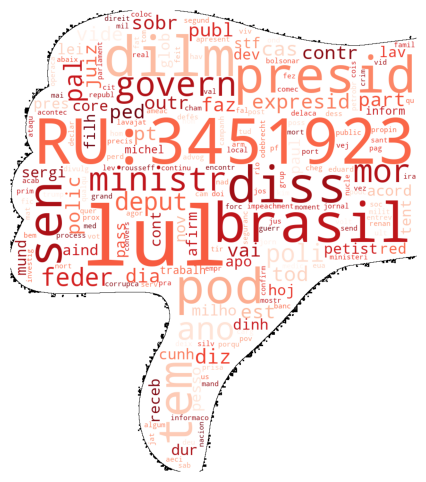

In [34]:
# Gerar uma Nuvem de palavras da classe Falsa

mask = np.array(Image.open('./negativo.jpg'))
wordcloud = WordCloud(
                      colormap="Reds",
                      background_color="white",
                      mask=mask,
                      contour_color='black',
                      contour_width=1).generate_from_frequencies(df_fake)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

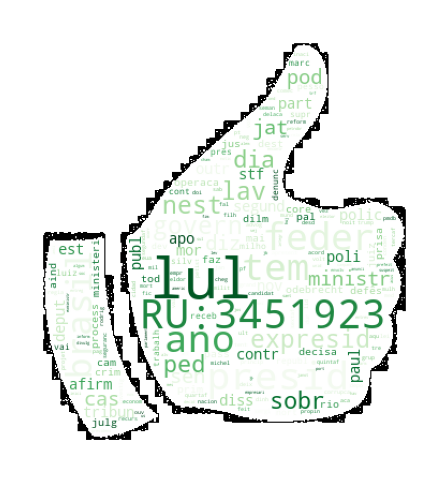

In [42]:
# Gerar uma Nuvem de palavras da classe Verdade

mask = np.array(Image.open('./positivo.jpg'))
wordcloud = WordCloud(
                      colormap="Greens_r",
                      background_color="white",
                      mask=mask,
                      contour_color='black',
                      contour_width=1).generate_from_frequencies(df_true)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);